In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


Mounted at /content/gdrive


Read CSV file

In [2]:
import pandas as pd

report = pd.read_csv('/content/gdrive/MyDrive/Data/report.csv', sep=',')
print(report)

birth = pd.read_csv('/content/gdrive/MyDrive/Data/birth.csv', sep=',')
print(birth)

breed = pd.read_csv('/content/gdrive/MyDrive/Data/breed.csv', sep=',')
print(breed)

spec = pd.read_csv('/content/gdrive/MyDrive/Data/spec.csv', sep=',')
print(spec)

submission = pd.read_csv('/content/gdrive/MyDrive/Data/submission.csv', sep=',')
print(submission)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


           1     2  3  4  ...  18                19              20        21
0          1  2013  3  A  ...   1               NaN  2013/3/5 00:00  501H8784
1          2  2013  4  A  ...   1               NaN  2013/3/5 00:00  501H8784
2          3  2013  5  A  ...   2               NaN  2013/3/5 00:00  501H8784
3          4  2013  6  A  ...   2               NaN  2013/3/5 00:00  501H8784
4          5  2013  7  A  ...   2               NaN  2013/3/5 00:00  501H8784
...      ...   ... .. ..  ...  ..               ...             ...       ...
37512  37513  2014  1  C  ...   0  2012/11/16 00:00             NaN       NaN
37513  37514  2014  5  C  ...   0  2012/11/16 00:00             NaN       NaN
37514  37515  2014  6  C  ...   0  2012/11/16 00:00             NaN       NaN
37515  37516  2014  7  C  ...   0  2012/11/16 00:00             NaN       NaN
37516  37517  2014  8  C  ...   0  2012/11/16 00:00             NaN       NaN

[37517 rows x 21 columns]
             1                2      

Show number of null data

In [ ]:
print(report.isnull().sum())
print(birth.isnull().sum())
print(breed.isnull().sum())
print(spec.isnull().sum())

1         0
2         0
3         0
4         0
5         0
6       876
7      3584
8         0
9         0
10        1
11     4263
12        1
13        0
14        0
15        0
16     1536
17     1536
18        0
19    17420
20     1431
21     1431
dtype: int64
1        0
2        0
3     1637
4     2907
5     3753
6     3051
7        0
8        0
9        0
10     903
11    3408
12    2802
13       0
dtype: int64
1        0
2        0
3        0
4        0
5        0
6    20837
7    20822
8        0
dtype: int64
1       0
2       0
3     613
4       0
5    3165
6    1258
7       0
dtype: int64


Add extra feature climate 

In [3]:
climate={#from google search "place" + "氣候"
    "A": #桃園楊梅
    {
      "high":[17,17,19,24,26,29,32,31,29,26,22,19],
      "low":[12,12,14,18,21,24,25,25,23,21,17,13]
    },
    "B":#彰化福興
    {
      "high":[20,19,22,26,29,31,32,32,31,28,25,21],
      "low":[13,13,15,19,23,25,26,26,24,21,18,15]
    },
    "C":#屏東萬丹
    {
      "high":[25,26,28,30,32,32,33,32,32,31,28,25],
      "low":[14,15,18,21,23,25,25,25,24,22,19,15]
    }
}

report["highDegree"]=report[["3","4"]].apply(lambda row:climate[row["4"]]["high"][int(row["3"])-1] ,axis=1)
report["lowDegree"]=report[["3","4"]].apply(lambda row:climate[row["4"]]["low"][int(row["3"])-1] ,axis=1)

print(report)

           1     2  3  4  ...              20        21 highDegree lowDegree
0          1  2013  3  A  ...  2013/3/5 00:00  501H8784         19        14
1          2  2013  4  A  ...  2013/3/5 00:00  501H8784         24        18
2          3  2013  5  A  ...  2013/3/5 00:00  501H8784         26        21
3          4  2013  6  A  ...  2013/3/5 00:00  501H8784         29        24
4          5  2013  7  A  ...  2013/3/5 00:00  501H8784         32        25
...      ...   ... .. ..  ...             ...       ...        ...       ...
37512  37513  2014  1  C  ...             NaN       NaN         25        14
37513  37514  2014  5  C  ...             NaN       NaN         32        23
37514  37515  2014  6  C  ...             NaN       NaN         32        25
37515  37516  2014  7  C  ...             NaN       NaN         33        25
37516  37517  2014  8  C  ...             NaN       NaN         32        25

[37517 rows x 23 columns]


Get submission data

In [4]:
sub_data = pd.DataFrame(columns=report.columns)
idx = 0
for i in report['1']:
  for j in submission['ID']:
    if i == j:
      for c in sub_data.columns:
        sub_data.loc[idx, str(c)] = report[str(c)][i-1]
      idx = idx + 1
print(sub_data)

          1     2  3  4  ...               20          21 highDegree lowDegree
0       480  2019  1  A  ...   2018/1/6 00:00  614HO07276         17        12
1       742  2019  2  A  ...  2019/2/28 00:00  551HO00695         17        12
2       743  2019  3  A  ...  2019/2/28 00:00  551HO00695         19        14
3       744  2019  4  A  ...  2019/2/28 00:00  551HO00695         24        18
4       745  2019  5  A  ...  2019/2/28 00:00  551HO00695         26        21
...     ...   ... .. ..  ...              ...         ...        ...       ...
4258  37481  2019  6  C  ...  2019/7/24 00:00  001HO12901         32        25
4259  37482  2019  6  C  ...              NaN         NaN         32        25
4260  37483  2019  6  C  ...              NaN         NaN         32        25
4261  37484  2019  7  C  ...              NaN         NaN         33        25
4262  37485  2019  7  C  ...              NaN         NaN         33        25

[4263 rows x 23 columns]


Select feature to preprocessing

In [5]:
train_data = pd.DataFrame(data=report, columns=['2', '3', '4', '5', '6', '7', '9', '11', 
                          '10', '14', '18', '21', 'highDegree', 'lowDegree', 'season',
                          'cycle', 'times', 'sub', 'year', 'health', 'weight', 'accuracy_times', 
                          'milk_degree', 'Correction_coefficient'])
print(train_data)
sub_data = pd.DataFrame(data=sub_data, columns=['2', '3', '4', '5', '6', '7', '9', '10', '14', '18', '21', 
                          'highDegree', 'lowDegree', 'season',
                          'cycle', 'times', 'sub', 'year', 'health', 'weight', 
                          'accuracy_times', 'milk_degree', 'Correction_coefficient'])

train_data = train_data.dropna(subset=['11'])
train_data.reset_index(inplace=True)
print(train_data.head())
print(sub_data.head())
print(train_data.isnull().sum())
print(sub_data.isnull().sum())

          2  3  4  ...  accuracy_times milk_degree Correction_coefficient
0      2013  3  A  ...             NaN         NaN                    NaN
1      2013  4  A  ...             NaN         NaN                    NaN
2      2013  5  A  ...             NaN         NaN                    NaN
3      2013  6  A  ...             NaN         NaN                    NaN
4      2013  7  A  ...             NaN         NaN                    NaN
...     ... .. ..  ...             ...         ...                    ...
37512  2014  1  C  ...             NaN         NaN                    NaN
37513  2014  5  C  ...             NaN         NaN                    NaN
37514  2014  6  C  ...             NaN         NaN                    NaN
37515  2014  7  C  ...             NaN         NaN                    NaN
37516  2014  8  C  ...             NaN         NaN                    NaN

[37517 rows x 24 columns]
   index     2  3  ... accuracy_times  milk_degree Correction_coefficient
0      0  2

Drop the row if milkvolum=0

In [6]:
for i in range(len(train_data['11'])):
  if train_data['11'][i] == 0:
    train_data = train_data.drop([i])

train_data.reset_index(inplace=True)
print(train_data)

       level_0  index  ...  milk_degree  Correction_coefficient
0            0      0  ...          NaN                     NaN
1            1      1  ...          NaN                     NaN
2            2      2  ...          NaN                     NaN
3            3      3  ...          NaN                     NaN
4            4      4  ...          NaN                     NaN
...        ...    ...  ...          ...                     ...
33181    33249  37512  ...          NaN                     NaN
33182    33250  37513  ...          NaN                     NaN
33183    33251  37514  ...          NaN                     NaN
33184    33252  37515  ...          NaN                     NaN
33185    33253  37516  ...          NaN                     NaN

[33186 rows x 26 columns]


Get 2018 data(Optional)



In [ ]:
for i in range(len(train_data['2'])):
  if train_data['2'][i] < 2018:
    train_data = train_data.drop([i])

# train_data.reset_index(inplace=True)
print(train_data)

KeyboardInterrupt: ignored

Fill NaN weight feature with average weight

In [7]:
train_data['6'] = train_data['6'].fillna('NoData').astype('str')
train_data['7'] = train_data['7'].fillna('NoData').astype('str')
train_data['21'] = train_data['21'].fillna('NoData').astype('str')
train_data.dropna(subset=['6', '7', '10'], inplace=True)
train_data['year'] = train_data['2']
print(train_data)

sub_data['6'] = sub_data['6'].fillna('NoData').astype('str')
sub_data['7'] = sub_data['7'].fillna('NoData').astype('str')
sub_data['21'] = sub_data['21'].fillna('NoData').astype('str')
sub_data.dropna(subset=['6', '7', '10'], inplace=True)
sub_data['year'] = sub_data['2']
print(sub_data)


       level_0  index  ...  milk_degree  Correction_coefficient
0            0      0  ...          NaN                     NaN
1            1      1  ...          NaN                     NaN
2            2      2  ...          NaN                     NaN
3            3      3  ...          NaN                     NaN
4            4      4  ...          NaN                     NaN
...        ...    ...  ...          ...                     ...
33181    33249  37512  ...          NaN                     NaN
33182    33250  37513  ...          NaN                     NaN
33183    33251  37514  ...          NaN                     NaN
33184    33252  37515  ...          NaN                     NaN
33185    33253  37516  ...          NaN                     NaN

[33185 rows x 26 columns]
         2  3  4  ... accuracy_times milk_degree Correction_coefficient
0     2019  1  A  ...            NaN         NaN                    NaN
1     2019  2  A  ...            NaN         NaN             

Add health and weight feature according to spec.csv file

In [8]:
for i in range(len(spec)):
  dd = datetime.datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
  if len(train_data.index[train_data['5'] == spec['1'][i]]) > 0:
    for j in train_data.index[train_data['5'] == spec['1'][i]]:
      if train_data['year'][j] == dd.year and train_data['3'][j] == dd.month and train_data['4'][j] == spec['7'][i]:
          train_data.loc[j, 'health'] = 1

  if len(sub_data.index[sub_data['5'] == spec['1'][i]]) > 0:
    for j in sub_data.index[sub_data['5'] == spec['1'][i]]:
      if sub_data['year'][j] == dd.year and sub_data['3'][j] == dd.month and sub_data['4'][j] == spec['7'][i]:
          sub_data.loc[j, 'health'] = 1

avg_weight = birth['6'].mean()
birth['6'] = birth['6'].fillna(avg_weight)
for i in range(len(birth)):
  if len(train_data.index[train_data['5'] == birth['1'][i]]) > 0:
    for j in train_data.index[train_data['5'] == birth['1'][i]]:
      train_data.loc[j, 'weight'] = birth['6'][i]

  if len(sub_data.index[sub_data['5'] == birth['1'][i]]) > 0:
    for j in sub_data.index[sub_data['5'] == birth['1'][i]]:
      sub_data.loc[j, 'weight'] = birth['6'][i]


In [9]:
train_data['weight'] = train_data['weight'].fillna(avg_weight)
# train_data['weight'] = (train_data['weight'] - train_data['weight'].mean()) / (train_data['weight'].max() - train_data['weight'].min())
# train_data['weight'] = train_data['weight'] / train_data['weight'].max()
train_data['highDegree'] = train_data['highDegree']/train_data['highDegree'].max()
train_data['lowDegree'] = train_data['lowDegree']/train_data['lowDegree'].max()
train_data = train_data.fillna(0)
train_data.reset_index(inplace=True, drop=True)
print(train_data)


sub_data['weight'] = sub_data['weight'].fillna(avg_weight)
# sub_data['weight'] = (sub_data['weight'] - sub_data['weight'].mean()) / (sub_data['weight'].max() - sub_data['weight'].min())
# sub_data['weight'] = sub_data['weight'] / sub_data['weight'].max()
sub_data['highDegree'] = sub_data['highDegree']/sub_data['highDegree'].max()
sub_data['lowDegree'] = sub_data['lowDegree']/sub_data['lowDegree'].max()
train_data = train_data.fillna(0)
sub_data = sub_data.fillna(0)
sub_data.reset_index(inplace=True, drop=True)


print(sub_data)
print(train_data.isnull().sum())
print(sub_data.isnull().sum())

       level_0  index  ...  milk_degree  Correction_coefficient
0            0      0  ...          0.0                     0.0
1            1      1  ...          0.0                     0.0
2            2      2  ...          0.0                     0.0
3            3      3  ...          0.0                     0.0
4            4      4  ...          0.0                     0.0
...        ...    ...  ...          ...                     ...
33180    33249  37512  ...          0.0                     0.0
33181    33250  37513  ...          0.0                     0.0
33182    33251  37514  ...          0.0                     0.0
33183    33252  37515  ...          0.0                     0.0
33184    33253  37516  ...          0.0                     0.0

[33185 rows x 26 columns]
         2  3  4  ...  accuracy_times milk_degree Correction_coefficient
0     2019  1  A  ...             0.0         0.0                    0.0
1     2019  2  A  ...             0.0         0.0          

In [10]:
for i in range(len(train_data['3'])):
  month = int(train_data['3'][i])
  times = int(train_data['9'][i])
  days = int(train_data['10'][i])
  if 3 <= month <= 5:
    train_data.loc[i, 'season'] = 'Spring'
  elif 6 <= month <= 8:
    train_data.loc[i, 'season'] = 'Summer'
  elif 9 <= month <= 11:
    train_data.loc[i, 'season'] = 'Autumn'
  else:
    train_data.loc[i, 'season'] = 'Winter'
  
  # if days <= 15:
  #   train_data[i, 'milk_degree'] = 0
  # elif 16 <= days <= 100:
  #   train_data[i, 'milk_degree'] = 1
  # elif 101 <= days <= 200:
  #   train_data[i, 'milk_degree'] = 2
  # else:
  #   train_data[i, 'milk_degree'] = 3

  if times <= 1:
    if days <= 46:
      train_data.loc[i, 'cycle'] = 0
      train_data.loc[i, 'accuracy_times'] = 0.72
    elif 47 <= days <= 75:
      train_data.loc[i, 'cycle'] = 1
      train_data.loc[i, 'accuracy_times'] = 0.83
    elif 76 <= days <= 105:
      train_data.loc[i, 'cycle'] = 2
      train_data.loc[i, 'accuracy_times'] = 0.88
    elif 106 <= days <= 135:
      train_data.loc[i, 'cycle'] = 3
      train_data.loc[i, 'accuracy_times'] = 0.92
    elif 136 <= days <= 165:
      train_data.loc[i, 'cycle'] = 4
      train_data.loc[i, 'accuracy_times'] = 0.94
    elif 166 <= days <= 195:
      train_data.loc[i, 'cycle'] = 5
      train_data.loc[i, 'accuracy_times'] = 0.96
    elif 196 <= days <= 225:
      train_data.loc[i, 'cycle'] = 6
      train_data.loc[i, 'accuracy_times'] = 0.97
    elif 226 <= days <= 255:
      train_data.loc[i, 'cycle'] = 7
      train_data.loc[i, 'accuracy_times'] = 0.98
    elif 256 <= days <= 285:
      train_data.loc[i, 'cycle'] = 8
      train_data.loc[i, 'accuracy_times'] = 0.99
    elif 286 <= days <= 305:
      train_data.loc[i, 'cycle'] = 9
      train_data.loc[i, 'accuracy_times'] = 1.0
    else:
      train_data.loc[i, 'cycle'] = 10
      train_data.loc[i, 'accuracy_times'] = 0.
  else:
    # 0.6	0.74	0.82	0.86	0.91	0.93	0.96	0.98	0.99	1.00
    if days <= 46:
      train_data.loc[i, 'cycle'] = 0
      train_data.loc[i, 'accuracy_times'] = 0.6
    elif 47 <= days <= 75:
      train_data.loc[i, 'cycle'] = 1
      train_data.loc[i, 'accuracy_times'] = 0.74
    elif 76 <= days <= 105:
      train_data.loc[i, 'cycle'] = 2
      train_data.loc[i, 'accuracy_times'] = 0.82
    elif 106 <= days <= 135:
      train_data.loc[i, 'cycle'] = 3
      train_data.loc[i, 'accuracy_times'] = 0.86
    elif 136 <= days <= 165:
      train_data.loc[i, 'cycle'] = 4
      train_data.loc[i, 'accuracy_times'] = 0.91
    elif 166 <= days <= 195:
      train_data.loc[i, 'cycle'] = 5
      train_data.loc[i, 'accuracy_times'] = 0.93
    elif 196 <= days <= 225:
      train_data.loc[i, 'cycle'] = 6
      train_data.loc[i, 'accuracy_times'] = 0.96
    elif 226 <= days <= 255:
      train_data.loc[i, 'cycle'] = 7
      train_data.loc[i, 'accuracy_times'] = 0.98
    elif 256 <= days <= 285:
      train_data.loc[i, 'cycle'] = 8
      train_data.loc[i, 'accuracy_times'] = 0.99
    elif 286 <= days <= 305:
      train_data.loc[i, 'cycle'] = 9
      train_data.loc[i, 'accuracy_times'] = 1.0
    else:
      train_data.loc[i, 'cycle'] = 10
      train_data.loc[i, 'accuracy_times'] = 0.


  if times <= 2:
    train_data.loc[i, 'times'] = 0
  elif times >= 7:
    train_data.loc[i, 'times'] = 2
  else:
    train_data.loc[i, 'times'] = 1

  train_data.loc[i, 'sub'] = 2019 - int(train_data['year'][i])

for i in range(len(sub_data['3'])):
  month = int(sub_data['3'][i])
  times = int(sub_data['9'][i])
  days = int(sub_data['10'][i])
  if 3 <= month <= 5:
    sub_data.loc[i, 'season'] = 'Spring'
  elif 6 <= month <= 8:
    sub_data.loc[i, 'season'] = 'Summer'
  elif 9 <= month <= 11:
    sub_data.loc[i, 'season'] = 'Autumn'
  else:
    sub_data.loc[i, 'season'] = 'Winter'
  
  # if days <= 15:
  #   sub_data[i, 'milk_degree'] = 0
  # elif 16 <= days <= 100:
  #   sub_data[i, 'milk_degree'] = 1
  # elif 101 <= days <= 200:
  #   sub_data[i, 'milk_degree'] = 2
  # else:
  #   sub_data[i, 'milk_degree'] = 3


  if times <= 1:
    # 0.72	0.83	0.88	0.92	0.94	0.96	0.97	0.98	0.99	1.00
    if days <= 46:
      sub_data.loc[i, 'cycle'] = 0
      sub_data.loc[i, 'accuracy_times'] = 0.72
    elif 47 <= days <= 75:
      sub_data.loc[i, 'cycle'] = 1
      sub_data.loc[i, 'accuracy_times'] = 0.83
    elif 76 <= days <= 105:
      sub_data.loc[i, 'cycle'] = 2
      sub_data.loc[i, 'accuracy_times'] = 0.88
    elif 106 <= days <= 135:
      sub_data.loc[i, 'cycle'] = 3
      sub_data.loc[i, 'accuracy_times'] = 0.92
    elif 136 <= days <= 165:
      sub_data.loc[i, 'cycle'] = 4
      sub_data.loc[i, 'accuracy_times'] = 0.94
    elif 166 <= days <= 195:
      sub_data.loc[i, 'cycle'] = 5
      sub_data.loc[i, 'accuracy_times'] = 0.96
    elif 196 <= days <= 225:
      sub_data.loc[i, 'cycle'] = 6
      sub_data.loc[i, 'accuracy_times'] = 0.97
    elif 226 <= days <= 255:
      sub_data.loc[i, 'cycle'] = 7
      sub_data.loc[i, 'accuracy_times'] = 0.98
    elif 256 <= days <= 285:
      sub_data.loc[i, 'cycle'] = 8
      sub_data.loc[i, 'accuracy_times'] = 0.99
    elif 286 <= days <= 305:
      sub_data.loc[i, 'cycle'] = 9
      sub_data.loc[i, 'accuracy_times'] = 1.00
    else:
      sub_data.loc[i, 'cycle'] = 10
      sub_data.loc[i, 'accuracy_times'] = 0.0
  else:  
    # 0.6	0.74	0.82	0.86	0.91	0.93	0.96	0.98	0.99	1.00
    if days <= 46:
      sub_data.loc[i, 'cycle'] = 0
      sub_data.loc[i, 'accuracy_times'] = 0.6
    elif 47 <= days <= 75:
      sub_data.loc[i, 'cycle'] = 1
      sub_data.loc[i, 'accuracy_times'] = 0.74
    elif 76 <= days <= 105:
      sub_data.loc[i, 'cycle'] = 2
      sub_data.loc[i, 'accuracy_times'] = 0.82
    elif 106 <= days <= 135:
      sub_data.loc[i, 'cycle'] = 3
      sub_data.loc[i, 'accuracy_times'] = 0.86
    elif 136 <= days <= 165:
      sub_data.loc[i, 'cycle'] = 4
      sub_data.loc[i, 'accuracy_times'] = 0.91
    elif 166 <= days <= 195:
      sub_data.loc[i, 'cycle'] = 5
      sub_data.loc[i, 'accuracy_times'] = 0.93
    elif 196 <= days <= 225:
      sub_data.loc[i, 'cycle'] = 6
      sub_data.loc[i, 'accuracy_times'] = 0.96
    elif 226 <= days <= 255:
      sub_data.loc[i, 'cycle'] = 7
      sub_data.loc[i, 'accuracy_times'] = 0.98
    elif 256 <= days <= 285:
      sub_data.loc[i, 'cycle'] = 8
      sub_data.loc[i, 'accuracy_times'] = 0.99
    elif 286 <= days <= 305:
      sub_data.loc[i, 'cycle'] = 9
      sub_data.loc[i, 'accuracy_times'] = 1.00
    else:
      sub_data.loc[i, 'cycle'] = 10
      sub_data.loc[i, 'accuracy_times'] = 0.0 

  if times <= 2:
    sub_data.loc[i, 'times'] = 0
  elif times >= 7:
    sub_data.loc[i, 'times'] = 2
  else:
    sub_data.loc[i, 'times'] = 1

  sub_data.loc[i, 'sub'] = 2019 - int(sub_data['year'][i])


train_data = train_data.fillna(0)
print(train_data)
sub_data = sub_data.fillna(0)
print(sub_data)


       level_0  index  ...  milk_degree  Correction_coefficient
0            0      0  ...          0.0                     0.0
1            1      1  ...          0.0                     0.0
2            2      2  ...          0.0                     0.0
3            3      3  ...          0.0                     0.0
4            4      4  ...          0.0                     0.0
...        ...    ...  ...          ...                     ...
33180    33249  37512  ...          0.0                     0.0
33181    33250  37513  ...          0.0                     0.0
33182    33251  37514  ...          0.0                     0.0
33183    33252  37515  ...          0.0                     0.0
33184    33253  37516  ...          0.0                     0.0

[33185 rows x 26 columns]
         2  3  4  ...  accuracy_times milk_degree Correction_coefficient
0     2019  1  A  ...            0.00         0.0                    0.0
1     2019  2  A  ...            0.60         0.0          

Get target

In [11]:
Y = train_data['11']
print(Y)

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33180    20.0
33181    21.0
33182    19.0
33183    12.0
33184    10.0
Name: 11, Length: 33185, dtype: float64


Select feature to train.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4cd3647f0>,
      dtype=object)

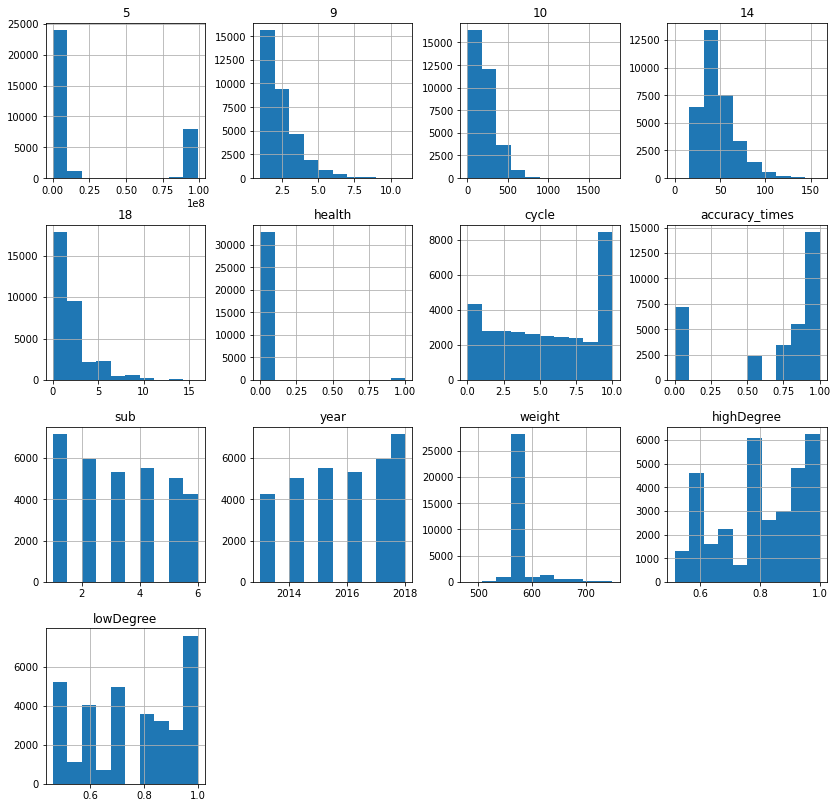

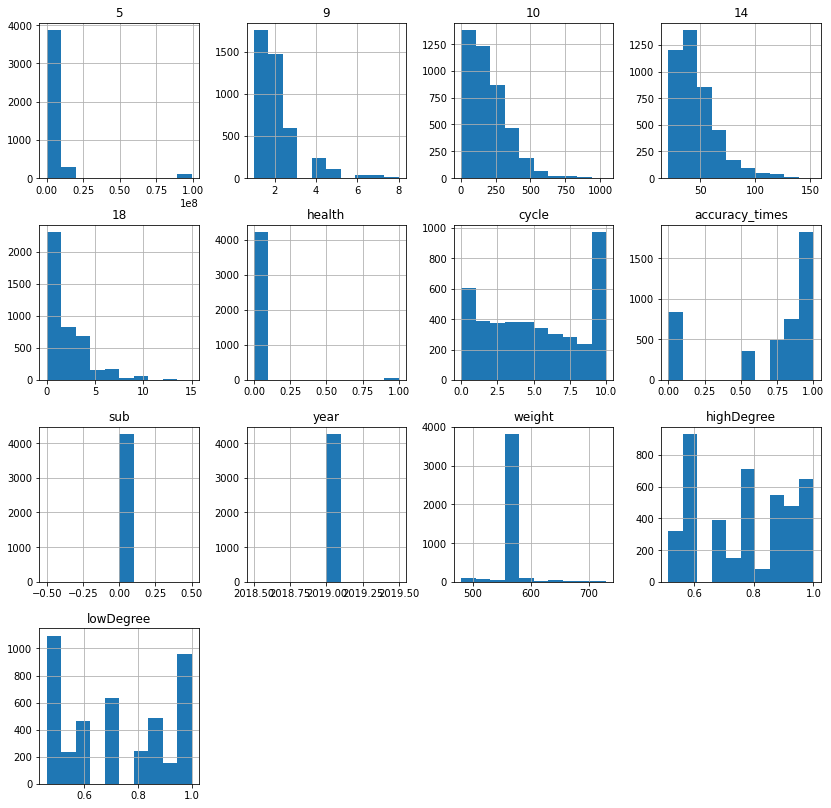

In [100]:
new_train = train_data
new_sub = sub_data
# selected_train = pd.DataFrame(data=report, columns=['2', '3', '4', '5', '6', '7', '9','10', '14', '18', '21', 'highDegree', 'lowDegree', 'season',
#       'cycle', 'times', 'sub', 'year', 'health', 'weight'])

                               

# 5.4x
selected_train = pd.DataFrame(data=new_train, columns=['4', '6','7', '5', '9','10','14','18', 'health', 'season', 
                            'cycle', 'accuracy_times', 'sub', 'year', 'weight', 'highDegree', 'lowDegree'])


# 6.787
# selected_train = pd.DataFrame(data=new_train, columns=['4', '5', '6', '7', '9', '10', '14', '18', '21', 'highDegree', 'lowDegree', 'season',
#                                                 'cycle', 'times', 'sub', 'year', 'health', 'weight'])
# 6.01
# selected_train = pd.DataFrame(data=new_train, columns=['4', '5', '9', '10', '14', '18', '21', 'highDegree', 'lowDegree', 'season',
#                                                 'cycle', 'times', 'health', 'weight'])
# 6.08
# selected_train = pd.DataFrame(data=new_train, columns=['4', '5', '9', '10', '14', '18', '21', 'season',
#                                                  'times', 'health', 'weight'])
# 6.24
# selected_train = pd.DataFrame(data=new_train, columns=['4', '5', '9', '10', '14', '18', '21', 'season', 'health', 'weight'])
# 6.08
# selected_train = pd.DataFrame(data=new_train, columns=['4', '5', '9', '10', '14', '18', '21', 'season', 'health'])


selected_sub = pd.DataFrame(data=new_sub, columns=selected_train.columns)

selected_train.hist(figsize=[14,14])
# selected_train.plot.kde()
selected_sub.hist(figsize=[14,14])
# selected_sub.plot.kde()





Label the feature and normalize.

In [102]:
labelencoder = LabelEncoder()
all_data = pd.concat([selected_train, selected_sub])
# all_data['10'] = (all_data['10'] - all_data['10'].mean())/(all_data['10'].max()-all_data['10'].min())
all_data['10'] = all_data['10'] / all_data['10'].max()
# all_data['14'] = (all_data['14'] - all_data['14'].mean())/(all_data['14'].max()-all_data['14'].min())
all_data['14'] = all_data['14']/all_data['14'].max()
# all_data['weight'] = (all_data['weight'] - all_data['weight'].mean())/(all_data['weight'].max()-all_data['weight'].min())
all_data['weight'] = all_data['weight']/all_data['weight'].max()
all_data['4'] = labelencoder.fit_transform(all_data['4'])
all_data['5'] = labelencoder.fit_transform(all_data['5'])
all_data['6'] = labelencoder.fit_transform(all_data['6'])
all_data['7'] = labelencoder.fit_transform(all_data['7'])
all_data['9'] = labelencoder.fit_transform(all_data['9'])
all_data['18'] = labelencoder.fit_transform(all_data['18'])
all_data['season'] = labelencoder.fit_transform(all_data['season'])
all_data['health'] = labelencoder.fit_transform(all_data['health'])
all_data['cycle'] = labelencoder.fit_transform(all_data['cycle'])
# all_data['times'] = labelencoder.fit_transform(all_data['times'])
print(all_data)

      4    6     5  9        10  ...  sub  year    weight  highDegree  lowDegree
0     0  219     0  0  0.043600  ...  6.0  2013  0.768779    0.575758   0.538462
1     0  219     0  0  0.059810  ...  6.0  2013  0.768779    0.727273   0.692308
2     0  219     0  0  0.078256  ...  6.0  2013  0.768779    0.787879   0.807692
3     0  219     0  0  0.097820  ...  6.0  2013  0.768779    0.878788   0.923077
4     0  219     0  0  0.117384  ...  6.0  2013  0.768779    0.969697   0.961538
...  ..  ...   ... ..       ...  ...  ...   ...       ...         ...        ...
4258  2   13  1462  0  0.008385  ...  0.0  2019  0.720000    0.969697   0.961538
4259  2   13  1463  0  0.012297  ...  0.0  2019  0.653333    0.969697   0.961538
4260  2   13  1464  0  0.011738  ...  0.0  2019  0.720000    0.969697   0.961538
4261  2   13  1464  0  0.028508  ...  0.0  2019  0.720000    1.000000   0.961538
4262  2   13  1465  0  0.008385  ...  0.0  2019  0.673333    1.000000   0.961538

[37448 rows x 16 columns]


One-hot encoding label feature

In [103]:
df = all_data
df['4'] = df['4'].astype('category')
df['5'] = df['5'].astype('category')
df['6'] = df['6'].astype('category')
df['7'] = df['7'].astype('category')
df['9'] = df['9'].astype('category')
df['18'] = df['18'].astype('category')
df['health'] = df['health'].astype('category')
df['season'] = df['season'].astype('category')
df['cycle'] = df['cycle'].astype('category')

# df = pd.get_dummies(df)
print(df)

      4    6     5  9        10  ...  sub  year    weight highDegree lowDegree
0     0  219     0  0  0.043600  ...  6.0  2013  0.768779   0.575758  0.538462
1     0  219     0  0  0.059810  ...  6.0  2013  0.768779   0.727273  0.692308
2     0  219     0  0  0.078256  ...  6.0  2013  0.768779   0.787879  0.807692
3     0  219     0  0  0.097820  ...  6.0  2013  0.768779   0.878788  0.923077
4     0  219     0  0  0.117384  ...  6.0  2013  0.768779   0.969697  0.961538
...  ..  ...   ... ..       ...  ...  ...   ...       ...        ...       ...
4258  2   13  1462  0  0.008385  ...  0.0  2019  0.720000   0.969697  0.961538
4259  2   13  1463  0  0.012297  ...  0.0  2019  0.653333   0.969697  0.961538
4260  2   13  1464  0  0.011738  ...  0.0  2019  0.720000   0.969697  0.961538
4261  2   13  1464  0  0.028508  ...  0.0  2019  0.720000   1.000000  0.961538
4262  2   13  1465  0  0.008385  ...  0.0  2019  0.673333   1.000000  0.961538

[37448 rows x 16 columns]


Spilt selected data for training and testing

In [104]:
selected_train = df[:len(selected_train)]
selected_sub = df[len(selected_train):]


print(selected_train)
print(selected_sub)

       4    6     5  9        10  ...  sub  year    weight highDegree lowDegree
0      0  219     0  0  0.043600  ...  6.0  2013  0.768779   0.575758  0.538462
1      0  219     0  0  0.059810  ...  6.0  2013  0.768779   0.727273  0.692308
2      0  219     0  0  0.078256  ...  6.0  2013  0.768779   0.787879  0.807692
3      0  219     0  0  0.097820  ...  6.0  2013  0.768779   0.878788  0.923077
4      0  219     0  0  0.117384  ...  6.0  2013  0.768779   0.969697  0.961538
...   ..  ...   ... ..       ...  ...  ...   ...       ...        ...       ...
33180  2   87  1570  7  0.006708  ...  5.0  2014  0.966667   0.757576  0.538462
33181  2   87  1570  7  0.076579  ...  5.0  2014  0.966667   0.969697  0.884615
33182  2   87  1570  7  0.093907  ...  5.0  2014  0.966667   0.969697  0.961538
33183  2   87  1570  7  0.110117  ...  5.0  2014  0.966667   1.000000  0.961538
33184  2   87  1570  7  0.128004  ...  5.0  2014  0.966667   0.969697  0.961538

[33185 rows x 16 columns]
      4    6 

Trasform dataframe data to numpy array

In [105]:
X = selected_train.values
print(X)
print(X.shape)


sub_X = selected_sub.values
print(sub_X)
print(sub_X.shape)

[[0.00000000e+00 2.19000000e+02 0.00000000e+00 ... 7.68779343e-01
  5.75757576e-01 5.38461538e-01]
 [0.00000000e+00 2.19000000e+02 0.00000000e+00 ... 7.68779343e-01
  7.27272727e-01 6.92307692e-01]
 [0.00000000e+00 2.19000000e+02 0.00000000e+00 ... 7.68779343e-01
  7.87878788e-01 8.07692308e-01]
 ...
 [2.00000000e+00 8.70000000e+01 1.57000000e+03 ... 9.66666667e-01
  9.69696970e-01 9.61538462e-01]
 [2.00000000e+00 8.70000000e+01 1.57000000e+03 ... 9.66666667e-01
  1.00000000e+00 9.61538462e-01]
 [2.00000000e+00 8.70000000e+01 1.57000000e+03 ... 9.66666667e-01
  9.69696970e-01 9.61538462e-01]]
(33185, 16)
[[0.00000000e+00 2.00000000e+02 1.50000000e+01 ... 7.68779343e-01
  5.15151515e-01 4.61538462e-01]
 [0.00000000e+00 2.00000000e+02 2.40000000e+01 ... 7.68779343e-01
  5.15151515e-01 4.61538462e-01]
 [0.00000000e+00 2.00000000e+02 2.40000000e+01 ... 7.68779343e-01
  5.75757576e-01 5.38461538e-01]
 ...
 [2.00000000e+00 1.30000000e+01 1.46400000e+03 ... 7.20000000e-01
  9.69696970e-01 9.6

Spilt training data for training and validation

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
# x_train = torch.from_numpy(x_train)
# x_test = torch.from_numpy(x_test)

# y_train = torch.from_numpy(y_train.to_numpy()).float()
# y_train = y_train.unsqueeze(1).float()
# y_test = torch.from_numpy(y_test.to_numpy()).float()
# y_test = y_test.unsqueeze(1).float()


# sub_X = torch.from_numpy(sub_X).float()
# print(sub_X.size())

Build XGBRegression model

In [108]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

def build_model():
  cv_params = {'n_estimators':[1200]}
  other_params = {'learning_rate': 0.05, 'n_estimators': 1200, 'max_depth': 7, 'min_child_weight': 1, 'seed': 1,
  'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.8, 'reg_alpha': 0, 'reg_lambda': 1, 'nthread':4}
  xgbr = XGBRegressor()
  # parameters = {'nthread':[4],
  #         'objective':['reg:squarederror'],
  #         'learning_rate':[.05],
  #         'max_depth':[9],
  #         'min_child_weight':[1],
  #         'silent':[1],
  #         'subsample':[0.8],
  #         'colsample_bytree':[0.8],
  #         'n_estimatores':[1000],
  #         'gamma': [0.8],
  #         'seed':[1],
  #         'reg_alpha': [0],
  #         'reg_lambda': [1],}
  # model = GridSearchCV(xgbr, parameters, cv=3, n_jobs=5, verbose=True)
  model = GridSearchCV(estimator = XGBRegressor(**other_params),
              param_grid = cv_params, scoring='r2' ,cv=5, n_jobs=10, verbose=1)
  return model

In [110]:
model = build_model()
model.fit(x_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.6min finished


[08:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0.8,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=7,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1200, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=1, silent=None,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=10, param_grid={'n_estimators': [1200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [111]:
evalute_result = model.best_estimator_
print('每輪迭代執行結果:{0}'.format(evalute_result))
print('引數的最佳取值：{0}'.format(model.best_params_))
print('最佳模型得分:{0}'.format(model.best_score_))

每輪迭代執行結果:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.8,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=None,
             subsample=0.8, verbosity=1)
引數的最佳取值：{'n_estimators': 1200}
最佳模型得分:0.6644456450341306


In [112]:
predict_val_y = model.predict(x_test)

sqre = 0.
for i in range(len(x_test)):
  sqre += (predict_val_y[i] - y_test.values[i]) ** 2
rmse = np.sqrt(sqre / len(x_test))
print(rmse)
print(predict_val_y)

prediction_sub = model.predict(sub_X)
submission['1'] = prediction_sub
print(submission)
submission.to_csv('predict.csv', index=False)

4.854292147378739
[13.523734 26.833883 24.527859 ... 20.580923 16.796026 22.801474]
         ID          1
0       480  18.287151
1       742  35.795486
2       743  35.088589
3       744  36.420422
4       745  27.429232
...     ...        ...
4258  37481  22.751219
4259  37482  20.035532
4260  37483  22.098639
4261  37484  21.784784
4262  37485  21.058472

[4263 rows x 2 columns]


Build ResNet50Regression model

In [ ]:
class identity_block(nn.Module):
  def __init__(self, n_features, units):
    super(identity_block, self).__init__()
    self.n_features = n_features
    self.units = units
    self.dense1 = nn.Linear(in_features=self.n_features, out_features=self.units)
    self.bn1 = nn.BatchNorm1d(self.units)

    self.dense2 = nn.Linear(in_features=self.units, out_features=self.units)
    self.bn2 = nn.BatchNorm1d(self.units)

    self.dense3 = nn.Linear(in_features=self.units, out_features=self.units)
    self.bn3 = nn.BatchNorm1d(self.units)

  def forward(self, input):
    x = self.dense1(input)
    x = self.bn1(x)
    x = F.relu(x)

    x = self.dense2(x)
    x = self.bn2(x)
    x = F.relu(x)

    x = self.dense3(x)
    x = self.bn3(x)

    x = x + input
    x = F.relu(x)

    return x

class dense_block(nn.Module):
  def __init__(self, n_features, units):
    super(dense_block, self).__init__()
    self.n_features = n_features
    self.units = units
    self.dense1 = nn.Linear(in_features=self.n_features, out_features=self.units)
    self.bn1 = nn.BatchNorm1d(self.units)

    self.dense2 = nn.Linear(in_features=self.units, out_features=self.units)
    self.bn2 = nn.BatchNorm1d(self.units)

    self.dense3 = nn.Linear(in_features=self.units, out_features=self.units)
    self.bn3 = nn.BatchNorm1d(self.units)

    self.shortcut = nn.Sequential(
        nn.Linear(in_features=self.n_features, out_features=self.units),
        nn.BatchNorm1d(self.units)
    )

  def forward(self, input):
    x = self.dense1(input)
    x = self.bn1(x)
    x = F.leaky_relu(x)

    x = self.dense2(x)
    x = self.bn2(x)
    x = F.leaky_relu(x)

    x = self.dense3(x)
    x = self.bn3(x)

    shortcut = self.shortcut(input)
    x = x + shortcut
    x = F.leaky_relu(x)

    return x

class ResNet50Regression(nn.Module):
  def __init__(self, n_features, units):
    super(ResNet50Regression, self).__init__()
    self.n_features = n_features
    self.units = units
    self.dense_block1 = dense_block(n_features=self.n_features, units=self.units)
    # self.identity_block1 = identity_block(n_features = self.units, units=self.units)
    # self.identity_block2 = identity_block(n_features=self.units, units=self.units)

    # self.dense_block2 = dense_block(n_features=self.units, units=self.units)
    # self.identity_block3 = identity_block(n_features=self.units, units=self.units)
    # self.identity_block4 = identity_block(n_features=self.units, units=self.units)

    # self.dense_block3 = dense_block(n_features=self.units, units=self.units)
    # self.identity_block5 = identity_block(n_features=self.units, units=self.units)
    # self.identity_block6 = identity_block(n_features=self.units, units=self.units)

    self.bn = nn.BatchNorm1d(self.units)
    self.predict = nn.Linear(in_features=units, out_features=1)

  def forward(self, input):
    x = self.dense_block1(input)
    # x = self.identity_block1(x)
    # x = self.identity_block2(x)

    # x = self.dense_block2(x)
    # x = self.identity_block3(x)
    # x = self.identity_block4(x)

    # x = self.dense_block3(x)
    # x = self.identity_block5(x)
    # x = self.identity_block6(x)

    x = self.bn(x)
    output = self.predict(x)

    return output


model = ResNet50Regression(n_features=x_train.shape[1], units=100)
print(model)


ResNet50Regression(
  (dense_block1): dense_block(
    (dense1): Linear(in_features=2038, out_features=100, bias=True)
    (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dense2): Linear(in_features=100, out_features=100, bias=True)
    (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dense3): Linear(in_features=100, out_features=100, bias=True)
    (bn3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential(
      (0): Linear(in_features=2038, out_features=100, bias=True)
      (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (predict): Linear(in_features=100, out_features=1, bias=True)
)


Root mean square error loss function

In [ ]:
class RMSELoss(torch.nn.Module):
  def __init__(self, eps=1e-6):
    super().__init__()
    self.mse = torch.nn.MSELoss()
    self.eps = eps
  
  def forward(self,yhat,y):
    loss = torch.sqrt(self.mse(yhat,y) + self.eps)
    return loss


Hyper parameters

In [ ]:
batch_size = 32
lr = 0.001
epochs = 5
loss = RMSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=5e-4)


Training step

In [ ]:
print("Start training!")
s_loss = 30.
for i in range(epochs):
  model.train()
  for j in range(int(len(x_train)/batch_size) + 1):
    # get mini-batch
    begin = j * batch_size
    end = min(begin + batch_size, x_train.shape[0] - 1)
    m_batch = end - begin
    
    x = x_train[begin:end].float()
    y = y_train[begin:end].float()
    prediction = model(x)
    rmse_loss = loss(prediction, y)
    
    optimizer.zero_grad()
    rmse_loss.backward()
    optimizer.step()
    if j % 50 == 0:
      model.eval()
      test_out = model(x_test.float())
      test_loss = loss(test_out, y_test.float())
      print('Epoch:{0}| Training loss:{1:.3f}| Validation loss:{2:.3f}'.format(i, rmse_loss.item(), test_loss.item()))
      if test_loss.item() < s_loss:
        print('Save the model!')
        torch.save(model, 'model.pth')
        s_loss = test_loss.item()
      model.train()


print('Training finished.')
# print('Save the model!')
# torch.save(model, 'model.pth')


Start training!
Epoch:0| Training loss:4.761| Validation loss:4.543
Save the model!
Epoch:0| Training loss:4.783| Validation loss:4.522
Save the model!
Epoch:0| Training loss:6.890| Validation loss:4.654
Epoch:0| Training loss:4.028| Validation loss:4.609
Epoch:0| Training loss:4.602| Validation loss:4.718
Epoch:0| Training loss:5.013| Validation loss:4.718
Epoch:0| Training loss:4.436| Validation loss:4.704
Epoch:0| Training loss:5.954| Validation loss:4.720
Epoch:0| Training loss:5.170| Validation loss:4.706
Epoch:0| Training loss:6.677| Validation loss:4.651
Epoch:0| Training loss:4.999| Validation loss:4.682
Epoch:0| Training loss:5.731| Validation loss:4.732
Epoch:0| Training loss:5.622| Validation loss:4.657
Epoch:0| Training loss:5.387| Validation loss:4.710
Epoch:0| Training loss:5.708| Validation loss:4.694
Epoch:0| Training loss:5.244| Validation loss:4.702
Epoch:0| Training loss:6.027| Validation loss:4.660
Epoch:1| Training loss:4.612| Validation loss:4.663
Epoch:1| Trainin

Validation step

In [ ]:
model = torch.load('model.pth')
model.eval()
x_test = x_test.float()
y_predict = model(x_test)
loss_test = loss(y_predict, y_test)
print(loss_test.item())
print(y_predict[:10])
print(y_test[:10])



4.521985054016113
tensor([[25.2262],
        [12.3937],
        [24.6949],
        [11.7251],
        [17.7895],
        [19.2129],
        [24.9466],
        [31.5093],
        [24.6911],
        [27.2769]], grad_fn=<SliceBackward>)
tensor([[26.4000],
        [19.0000],
        [23.0000],
        [10.0000],
        [14.0000],
        [17.7000],
        [22.0000],
        [33.5000],
        [25.0000],
        [29.0000]])


Testing step

In [ ]:
prediction = model(sub_X)
submission['1'] = prediction.detach().numpy()
print(submission)
# submission.to_csv('./predict/predict' + str(loss_test.item()) + '.csv', index=False)
submission.to_csv('./predict/predict.csv', index=False)

         ID          1
0       480  16.628971
1       742  31.232782
2       743  32.232880
3       744  31.353014
4       745  26.113548
...     ...        ...
4258  37481  19.201256
4259  37482  19.401024
4260  37483  19.456896
4261  37484  20.221197
4262  37485  18.646587

[4263 rows x 2 columns]
